下面这一段代码来自
https://colab.research.google.com/github/hylu666/hku-physics4150/blob/main/ED/ED_Heisenberg.ipynb#scrollTo=8NGhpc-lSe8m

他以$S=1/2$的Heisenberg Model为例，展示了给定基（顺序）下的哈密顿量矩阵的构建过程

In [91]:
import numpy as np
import scipy as sp
from scipy import sparse
from scipy import linalg
from scipy.sparse import linalg
import matplotlib.pyplot as plt

# Matrix Construction

In [9]:
N=4
dimension=2**N
#spin chain with all spin-down
z='0'*N

for a in range(dimension):
    state_chain = bin(a)[2:]  # 将整数a转换为二进制字符串，忽略前两个字符'0b'
    length = len(state_chain)
    state_chain = z[0:N-length] + state_chain  # 将二进制字符串的长度补齐至N, z='0'*N
    print(a,":",state_chain)

0 : 0000
1 : 0001
2 : 0010
3 : 0011
4 : 0100
5 : 0101
6 : 0110
7 : 0111
8 : 1000
9 : 1001
10 : 1010
11 : 1011
12 : 1100
13 : 1101
14 : 1110
15 : 1111


利用二进制数来表示基（以及基的顺序）是自然而然的。

In [23]:
#check
state_chain = bin(10)[2:]
print(state_chain[0],state_chain[1],state_chain[2],state_chain[N-1]) #now state_chain is "1010"
element_3 = state_chain[3]
print(element_3,"element_3")
element_2 = state_chain[2]
print(element_2,"element_2")
state_chain1 = element_2 + state_chain[1:N-1] + element_3
print(element_2,"+",state_chain[1:N-1],"+",element_3,"=",state_chain1)
#in Python,array[0:N]: index=0,1,...N-1
#state_chain has 0~N-1,so state_chain[1:N-1] is index=1,2,...N-2

1 0 1 0
0 element_3
1 element_2
1 + 01 + 0 = 1010


非常有趣的就在于，这个操作效果使得一个新的态是在二进制链的开头和结尾添加了两个元素 element_i 和 element_j.  而且这两个元素是从二进制表示state_chain中提取的，而不能是手动赋值的，手动赋值比如element_3 = 0，这样会导致element_3是十进制下的"0".

In [15]:
state_chain1 = state_chain[0:3] + element_2 + element_3 + state_chain[2+1:]
print(state_chain[0:3],"+",element_2,"+",element_3,"+",state_chain[2+1:])
print(state_chain1)

101 + 1 + 0 + 0
101100


In [16]:
state_chain1 = state_chain[0:2] + element_3 + element_2 + state_chain[3+1:]
print(state_chain[0:2],"+",element_2,"+",element_3,"+",state_chain[3+1:])
print(state_chain1)

10 + 1 + 0 + 
1001


因此，上面两种加法里第一种给出了错误的结果，是因为加的顺序和state_chain保留的元素位置没对

In [154]:
N=4
dimension=2**N
#spin chain with all spin-down
z='0'*N
# initialize hamiltonian
H=np.zeros((dimension,dimension))

for a in range(dimension):
    state_chain = bin(a)[2:]  # 将整数a转换为二进制字符串，忽略前两个字符'0b'
    length = len(state_chain)
    state_chain = z[0:N-length] + state_chain  # 将二进制字符串的长度补齐至N, z='0'*N
    
    # 对于周期性边界条件(PBC)，设置i在range(N)
    # 对于开放边界条件(OBC)，设置i在range(N-1)
    for i in range(N):  #In python, i = 0,1,2,...,N-1
        j = np.mod(i + 1, N)  # 对于周期性边界条件，计算j时取余
        if state_chain[i] == state_chain[j]:  # 自旋平行贡献为+，自旋相反贡献为-
            H[a, a] += 0.25  #aa表示哈密顿量的对角元
        else:  
            H[a, a] -= 0.25
            
            element_i = state_chain[i] #要么为1要么为0
            element_j = state_chain[j] #要么为1要么为0
            
            # 自旋翻转
            if j == 0:
                state_chain1 = element_i + state_chain[1:N-1] + element_j
            else:
                state_chain1 = state_chain[0:i] + element_j + element_i + state_chain[j+1:]
            
            b = int(state_chain1, 2)
            H[a, b] += 0.5

虽然还不太明白他自旋翻转这一块儿是怎么实现的。（这里先标记一下）

------

In [38]:
'''
It's get from http://graphics.stanford.edu/~seander/bithacks.html
'''

#右移算符 ">>"
what = 10 >> 1
print(10,">>",1,"=",what)
print(bin(10)[2:],"->",bin(what)[2:])

10 >> 1 = 5
1010 -> 0101


In [39]:
#右移算符 ">>"
what = 10 >> 2
print(10,">>",2,"=",what)
print(bin(10)[2:],"->",bin(what)[2:])

10 >> 2 = 2
1010 -> 0010


In [40]:
#右移算符 ">>"
what = 10 >> 3
print(10,">>",3,"=",what)
print(bin(10)[2:],"->",bin(what)[2:])

10 >> 3 = 1
1010 -> 0001


In [44]:
#左移算符 "<<"
what = 10 << 2
print(10,">>",3,"=",what)
print(bin(10)[2:],"->",bin(what)[2:])

10 >> 3 = 40
1010 -> 101000


In [50]:
#提取最右边的比特 "&"
what1 = (10 << 2) & 1
print(what1)

what2 = (10 >> 3) & 1 #0001 提取最右边的1个bit
print(what2)

what3 = (10 >> 2) & 2 #0010 提取最右边的2个bit
print(what3,bin(what3)[2:])

0
1
2 10


In [55]:
1 << 4
print((1 << 4),bin(16)[2:])

16 10000


In [68]:
#逐位异或算符"^"
print(10^8) #将两个整数的二进制表示逐位异或，相同为0，不同为1
print("1010","^","1000" ,"=", "0010")

2
1010 ^ 1000 = 0010


In [69]:
10 ^ (1<<3)
print(10 ^ (1<<3))

2


In [73]:
L = 4
old_state = 10 #1010
z='0'*L
# Apply transverse field
for site in range(L):
    # Flip one-spin at site
    print(site,":") #从右往左翻转第site个自旋
    new_state = old_state ^ (1 << site)
    length = len(bin(new_state)[2:])
    what = z[0:N-length] + bin(new_state)[2:]
    print(what)

0 :
1011
1 :
1000
2 :
1110
3 :
0010


可以看到利用异或和位移算符的确是可以实现单自旋翻转的

In [137]:
N=4
dimension=2**N
delta = 1
Jx = 1
#spin chain with all spin-down
z='0'*N
# initialize hamiltonian
H=np.zeros((dimension,dimension))

for a in range(dimension):
    state_chain = bin(a)[2:]  # 将整数a转换为二进制字符串，忽略前两个字符'0b'
    length = len(state_chain)
    state_chain = z[0:N-length] + state_chain  # 将二进制字符串的长度补齐至N, z='0'*N
    
    # 对于周期性边界条件(PBC)，设置i在range(N)
    # 对于开放边界条件(OBC)，设置i在range(N-1)
    for i in range(N):  #In python, i = 0,1,2,...,N-1
        j = np.mod(i + 1, N)  # 对于周期性边界条件，计算j时取余
        if state_chain[i] == state_chain[j]:  # 自旋平行贡献为+，自旋相反贡献为-
            H[a, a] += 0.25*delta  #aa表示哈密顿量的对角元
        else:  
            H[a, a] -= 0.25*delta #the element is delta/4
            
            element_i = state_chain[i] #要么为1要么为0
            element_j = state_chain[j] #要么为1要么为0
            
            # 自旋翻转
            if j == 0:
                state_chain1 = element_i + state_chain[1:N-1] + element_j
            else:
                state_chain1 = state_chain[0:i] + element_j + element_i + state_chain[j+1:]
            
            b = int(state_chain1, 2)
            H[a, b] += 0.5
            
            
        # Flip one-spin at site
        new_state =  int(state_chain, 2) ^ (1 << i)
        c = new_state
        H[a, c] += 0.5*Jx # hx/2

# delta = 1, hx = 1

In [161]:

def get_H(N,delta,Jx):
    dimension=2**N
    #spin chain with all spin-down
    z='0'*N
    # initialize hamiltonian
    H=np.zeros((dimension,dimension))
    
    for a in range(dimension):
        state_chain = bin(a)[2:]  # 将整数a转换为二进制字符串，忽略前两个字符'0b'
        length = len(state_chain)
        state_chain = z[0:N-length] + state_chain  # 将二进制字符串的长度补齐至N, z='0'*N
        
        # 对于周期性边界条件(PBC)，设置i在range(N)
        # 对于开放边界条件(OBC)，设置i在range(N-1)
        for i in range(N):  #In python, i = 0,1,2,...,N-1
            j = np.mod(i + 1, N)  # 对于周期性边界条件，计算j时取余
            if state_chain[i] == state_chain[j]:  # 自旋平行贡献为+，自旋相反贡献为-
                H[a, a] += 0.25*delta  #aa表示哈密顿量的对角元
            else:  
                H[a, a] -= 0.25*delta #the element is delta/4
                
                element_i = state_chain[i] #要么为1要么为0
                element_j = state_chain[j] #要么为1要么为0
                
                # 自旋翻转
                if j == 0:
                    state_chain1 = element_i + state_chain[1:N-1] + element_j
                else:
                    state_chain1 = state_chain[0:i] + element_j + element_i + state_chain[j+1:]
                
                b = int(state_chain1, 2)
                H[a, b] += 0.5
                
                
            # Flip one-spin at site
            new_state =  int(state_chain, 2) ^ (1 << i)
            c = new_state
            H[a, c] += 0.5*Jx # hx/2
            
    return H

In [130]:
N=8     # length of chain, keep it smaller than ~16, :-)
delta=-2      # strength of Heisenberg interaction
hx = 0

xishu = np.array([])
E = np.array([])

for i in range(int(4/0.01)+1):
    delta += 0.01

    hamiltonian = get_H(N,delta,hx)

    eigs = np.real(np.linalg.eig(hamiltonian)[0])
        
    xishu = np.append(xishu,delta)
    E = np.append(E, min(eigs)/N)

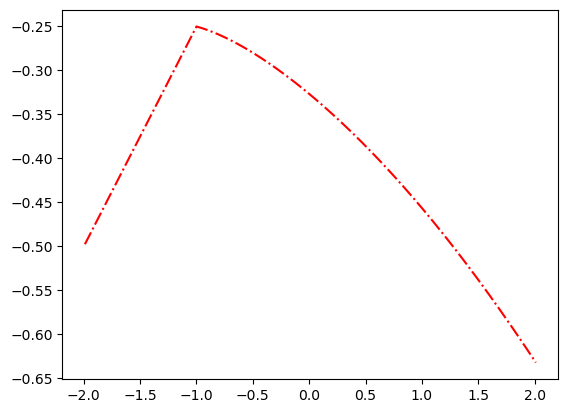

In [131]:
plt.plot(xishu,E,'-.',color='red')
plt.show()

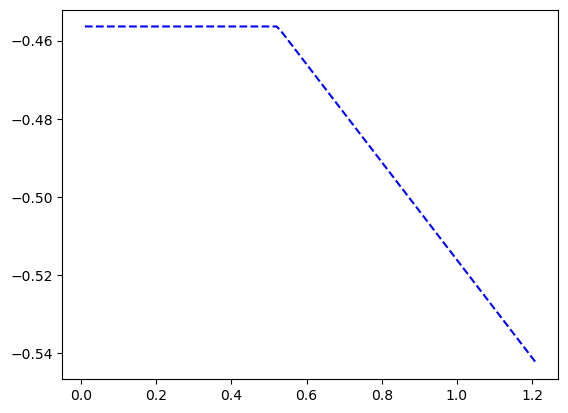

In [123]:
N=8     # length of chain, keep it smaller than ~16, :-)
delta=1.0      # strength of Heisenberg interaction
hx = 0

hengchang = np.array([])
E = np.array([])

for i in range(120+1):
    hx += 0.01

    hamiltonian = get_H(N,delta,hx)

    eigs = np.real(np.linalg.eig(hamiltonian)[0])
    
    hengchang = np.append(hengchang,hx)
    E = np.append(E, min(eigs)/N)
    
plt.plot(hengchang,E,'--',color='blue')
plt.show()

In [129]:
hamiltonian[0:5,0:5]

array([[2.   , 0.605, 0.605, 0.   , 0.605],
       [0.605, 1.   , 0.5  , 0.605, 0.   ],
       [0.605, 0.5  , 1.   , 0.605, 0.5  ],
       [0.   , 0.605, 0.605, 1.   , 0.   ],
       [0.605, 0.   , 0.5  , 0.   , 1.   ]])

In [142]:
eig_value=np.real(np.linalg.eig(H)[0])# eigen_values
eig_vec=np.real(np.linalg.eig(H)[1])

matrix_U=np.zeros((dimension,dimension)) #mat_U
matrix_Udag=np.zeros((dimension,dimension))
for i in range(dimension):
    matrix_U[:,i]=eig_vec[:,i].reshape(dimension)
    matrix_Udag[i,:]=np.conj(eig_vec[:,i].reshape(dimension))


mat_Sz=np.zeros((dimension,dimension))
mat_S2=np.zeros((dimension,dimension))


for a in range(dimension):
    state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain #make the length equal to N
    up_number=state_chain.count('1')
    down_number=N-up_number
    mat_Sz[a,a]=0.5*up_number-0.5*down_number

mat_Sz           # this measurement is written for N=2 only

array([[-1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [143]:
mz_list=[]
for i in range(dimension):
    mz_list.append(np.dot(np.dot(matrix_Udag,mat_Sz),matrix_U)[i,i])#measure
    
mz_list

[0.0, 0.0, -1.0, 1.0]

In [155]:
eig_value=np.real(np.linalg.eig(H)[0])# eigen_values
eig_vec=np.real(np.linalg.eig(H)[1])  # eigenstates
# ground state wave function
idx_sorted1 = np.argsort(eig_value)
eig_value=eig_value[idx_sorted1]
eig_vec=eig_vec[:,idx_sorted1]
eig_value[0], eig_vec[:,0]
groundstate = eig_vec[:,0]

mat_Sz=np.zeros((dimension,dimension))
mat_S2=np.zeros((dimension,dimension))


for a in range(dimension):
    state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain #make the length equal to N
    up_number=state_chain.count('1')
    down_number=N-up_number
    mat_Sz[a,a]=0.5*up_number-0.5*down_number

# mz_list=[]
mz_list = np.dot(groundstate,np.dot(mat_Sz,groundstate))
# for i in range(dimension):
#     mz_list.append(np.dot(np.dot(matrix_Udag,mat_Sz),matrix_U)[i,i])#measure
    
mz_list

-2.871446460697043e-32

In [156]:
ABSmat_Sz=np.zeros((dimension,dimension))

for a in range(dimension):
    state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain #make the length equal to N
    up_number=state_chain.count('1')
    down_number=N-up_number
    ABSmat_Sz[a,a]=0.5*up_number+0.5*down_number

mz_list = np.dot(groundstate,np.dot(ABSmat_Sz,groundstate))

mz_list

2.0000000000000004

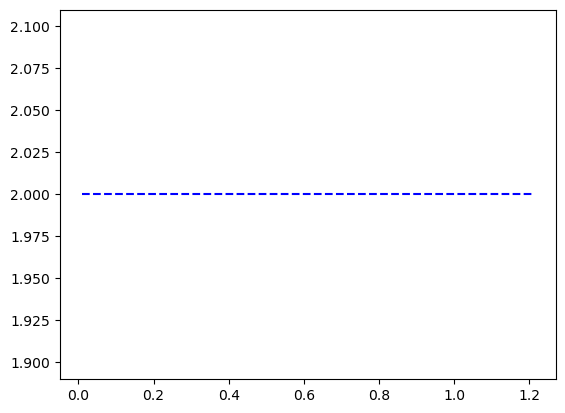

In [168]:
N=4     # length of chain, keep it smaller than ~16, :-)
delta=0.1      # strength of Heisenberg interaction
hx = 0

hengchang = np.array([])
mz_list = np.array([])

for i in range(120+1):
    hx += 0.01

    hamiltonian = get_H(N,delta,hx)

    eigs = np.real(np.linalg.eig(hamiltonian)[0])
    eig_vec=np.real(np.linalg.eig(hamiltonian)[1])  # eigenstates
    # ground state wave function
    idx_sorted1 = np.argsort(eig_value)
    eig_value=eig_value[idx_sorted1]
    eig_vec=eig_vec[:,idx_sorted1]
    eig_value[0], eig_vec[:,0]
    groundstate = eig_vec[:,0]
    
    ABSmat_Sz=np.zeros((dimension,dimension))

    for a in range(dimension):
        state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
        l=len(state_chain)
        state_chain=z[0:N-l]+state_chain #make the length equal to N
        up_number=state_chain.count('1')
        down_number=N-up_number
        ABSmat_Sz[a,a]=0.5*up_number+0.5*down_number
    
    mz = np.dot(groundstate,np.dot(ABSmat_Sz,groundstate))
    
    
    hengchang = np.append(hengchang,hx)
    mz_list = np.append(mz_list, mz)
    
plt.plot(hengchang,mz_list,'--',color='blue')
plt.show()